In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### 1.DATA CLEANING AND PREPARATION

#### Read the Data

In [2]:
# Reading the data
data=pd.read_csv("cardiotocographic.csv")
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


##### Identifing missing values

In [4]:
data.isnull()
#False indicates that there are no missing values
#True indicates that there are missing values

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2122,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2123,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2124,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()
# to know how many missing values in each column has

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
data.isnull().values.any()
# if any null value in the data set it returns True

np.True_

In [7]:
data.isnull().sum().sum()
# shows the total count of mising values

np.int64(167)

#### deleting missing values

In [8]:
data=data.dropna()
data
# removes rows with missing values

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [9]:
data=data.dropna(axis=1)
data
# removes the columns with missing values

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2105 non-null   float64
 2   FM        2105 non-null   float64
 3   UC        2105 non-null   float64
 4   DL        2105 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2105 non-null   float64
 8   MSTV      2105 non-null   float64
 9   ALTV      2105 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 246.7 KB


###### No inconsistencies in datatypes

In [11]:
# Identifing numerical columns
data1 = data.select_dtypes(include=['int64', 'float64']).columns
print(data1)

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')


##### Detecting the outliers visually

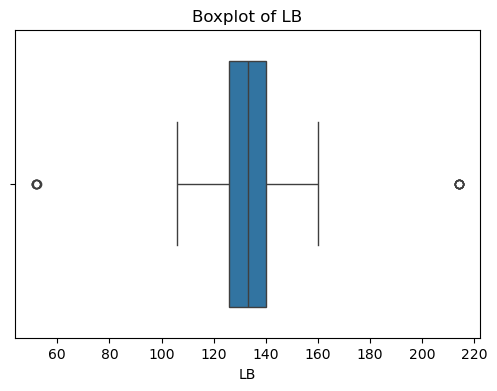

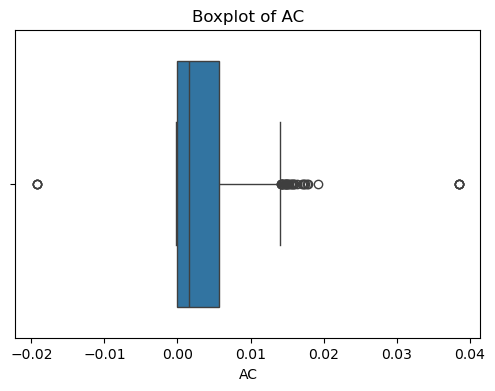

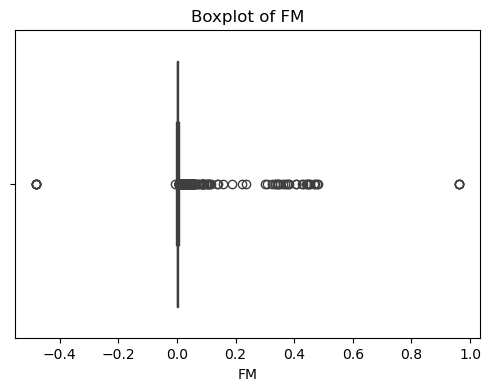

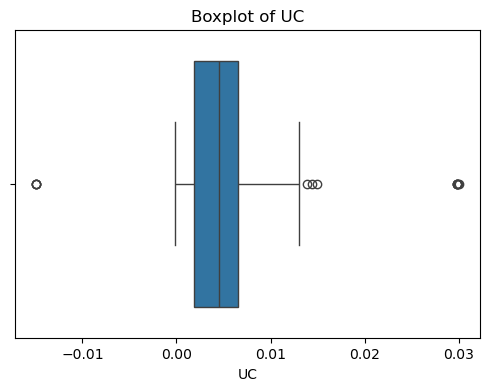

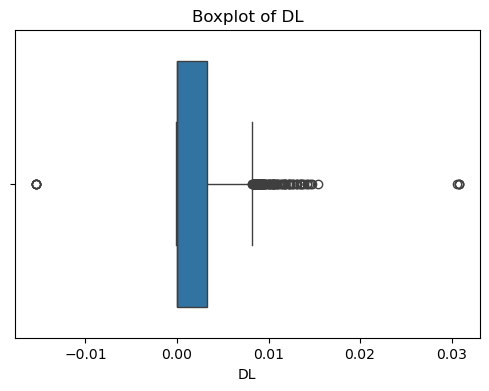

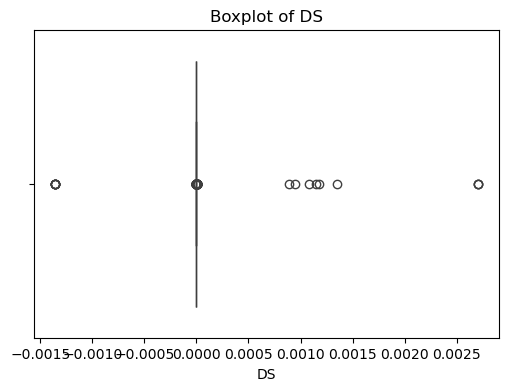

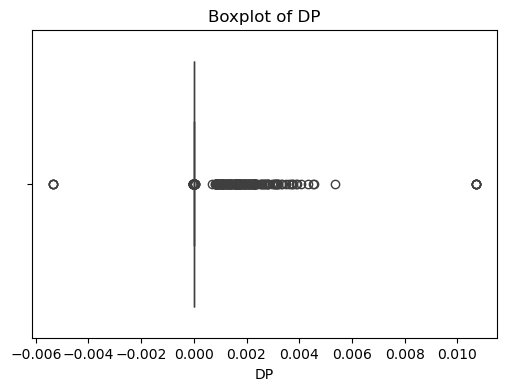

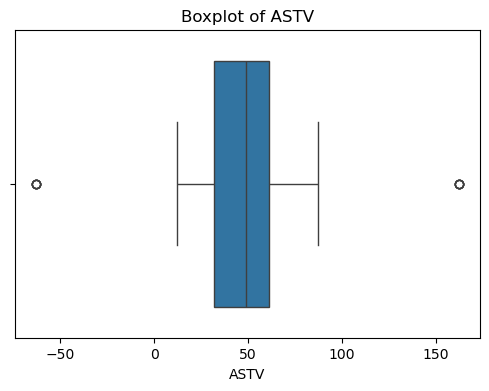

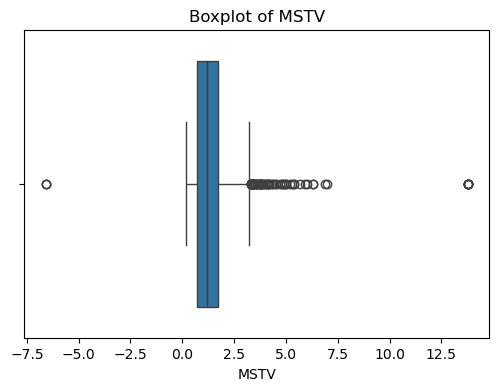

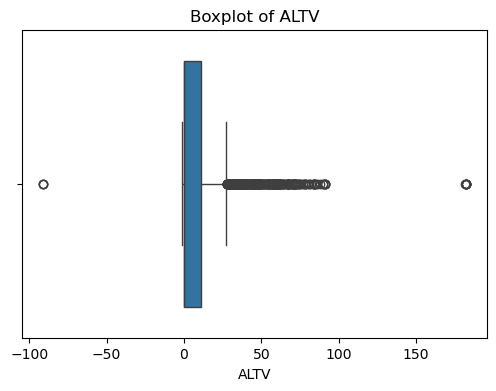

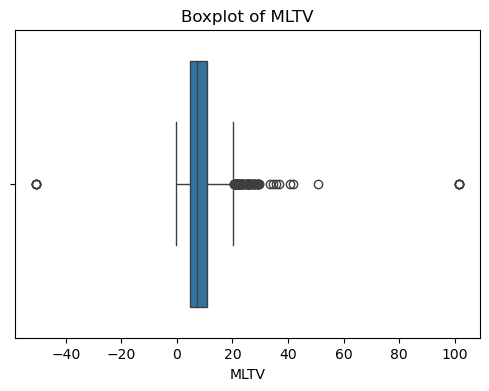

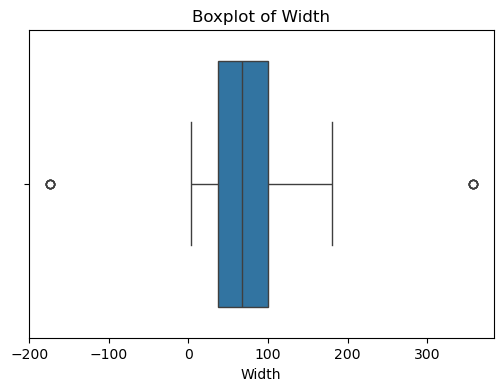

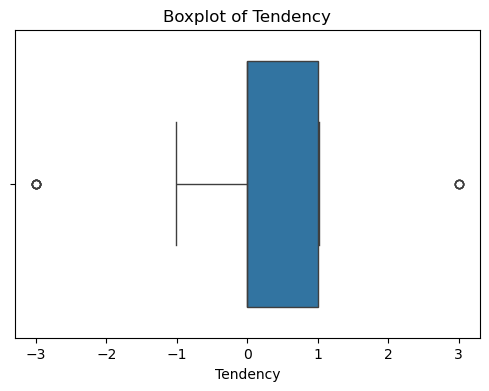

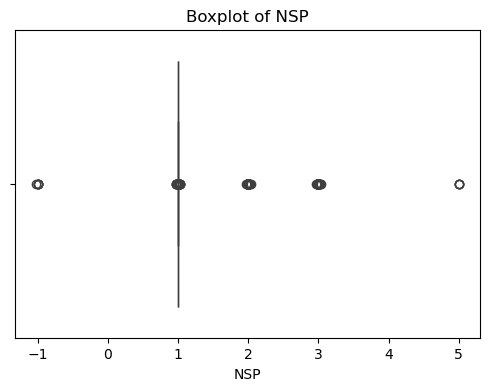

In [12]:
for col in data:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
plt.show()
# Dots outsize the whiskers are outliers

#### Replacig outliers with median

In [13]:
data_imputed = data.copy()

for col in data:
    Q1 = data_imputed[col].quantile(0.25)
    Q3 = data_imputed[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data_imputed[col].median()

    data_imputed.loc[(data_imputed[col] < lower_bound) | (data_imputed[col] > upper_bound), col] = median

data_imputed

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,0.0,2.4,64.0,0.999926,1.0
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,7.4,117.0,1.000000,1.0
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.000000,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,0.000000,1.0
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,1.000000,1.0
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,1.000000,1.0
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,1.000000,1.0


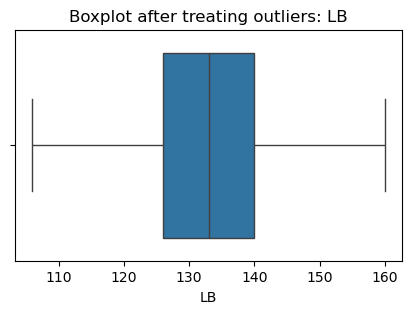

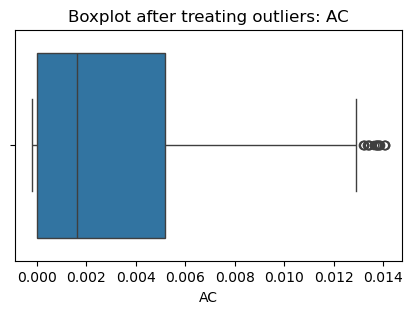

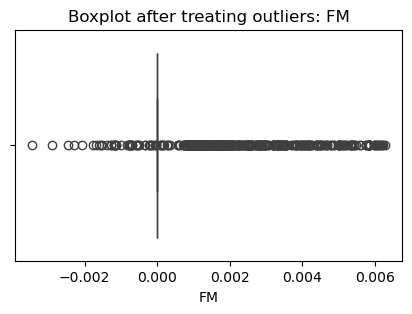

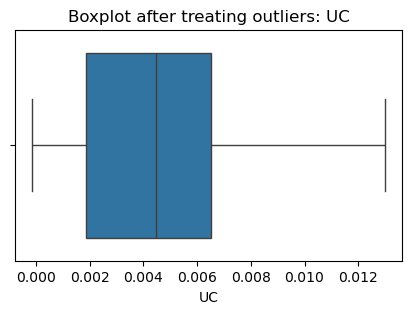

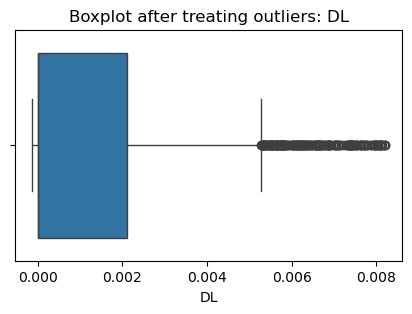

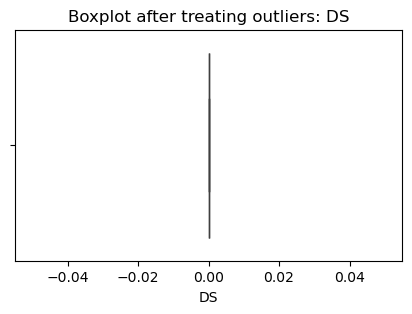

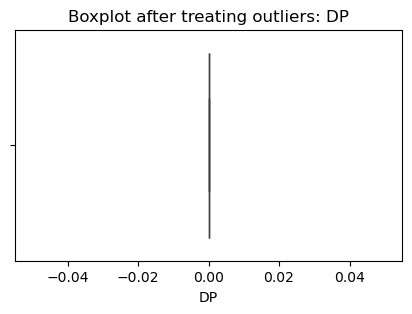

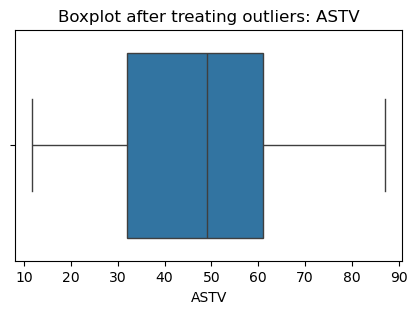

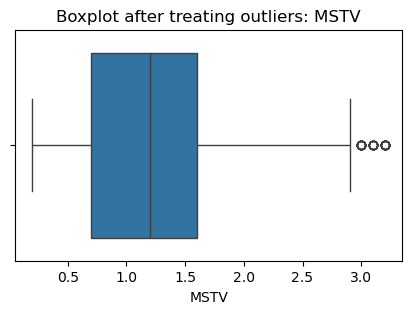

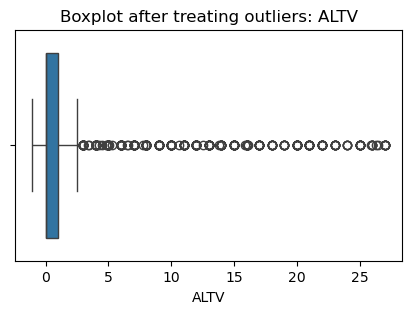

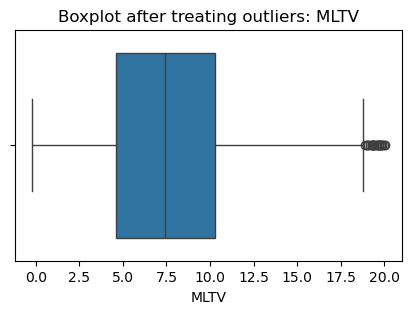

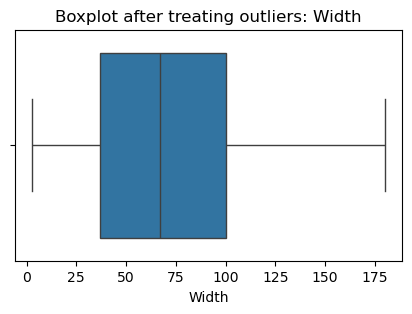

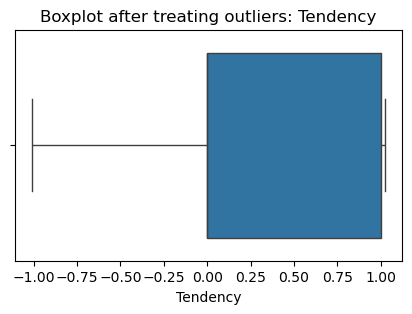

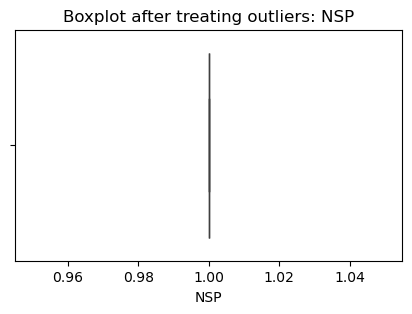

In [14]:
# after treating the outliers
for col in data:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data_imputed[col])
    plt.title(f'Boxplot after treating outliers: {col}')
    plt.show()


#### 2.STATISTICAL SUMMARY

In [15]:
stat_summary=pd.DataFrame({
    'Mean':data[data1].mean(),
    'Median':data[data1].median(),
    'standard_Deviation':data[data1].std(),
    'IQR': data[data1].quantile(0.75) - data[data1].quantile(0.25)
})

print(stat_summary)

                Mean      Median  standard_Deviation        IQR
LB        133.343598  133.000000           11.270154  14.000000
AC          0.003202    0.001631            0.004324   0.005650
FM          0.009963    0.000000            0.067870   0.002554
UC          0.004388    0.004484            0.003350   0.004698
DL          0.001892    0.000000            0.003348   0.003289
DS          0.000003    0.000000            0.000142   0.000000
DP          0.000175    0.000000            0.000840   0.000000
ASTV       46.996929   49.000000           18.847737  29.000000
MSTV        1.361006    1.200000            1.173164   1.000000
ALTV       10.353647    0.000000           21.282102  11.000000
MLTV        8.284887    7.400000            7.772858   6.300000
Width      70.429260   67.000000           42.931822  63.000000
Tendency    0.316371    0.000000            0.645622   1.000000
NSP         1.304507    1.000000            0.644619   0.000000


#### 3.	Data Visualization:

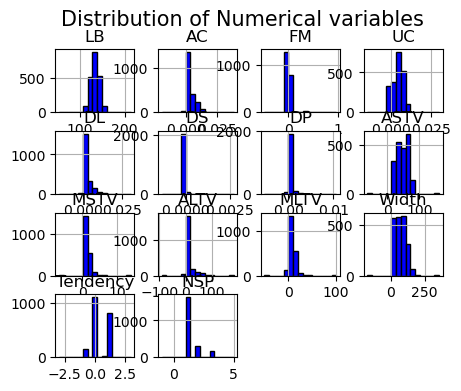

In [23]:
data[data1].hist(figsize=(5,4),bins=15,color='Blue',edgecolor='black')
plt.suptitle("Distribution of Numerical variables",fontsize=15)
plt.show()
#creating histogram to visualize the distribution of
#various numerical variables

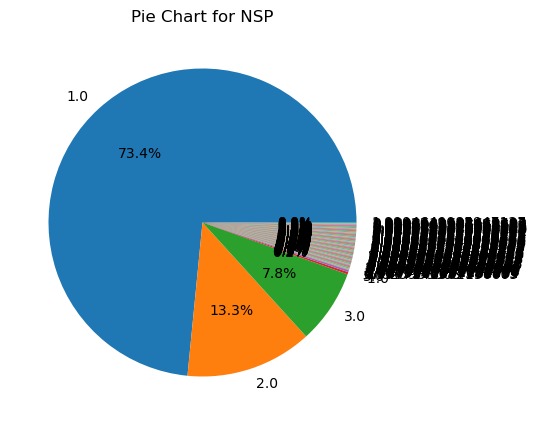

In [24]:
#pie charts to display the frequency of categories for categorical variables.
data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))
plt.title(f"Pie Chart for {col}")
plt.ylabel('')
plt.show()



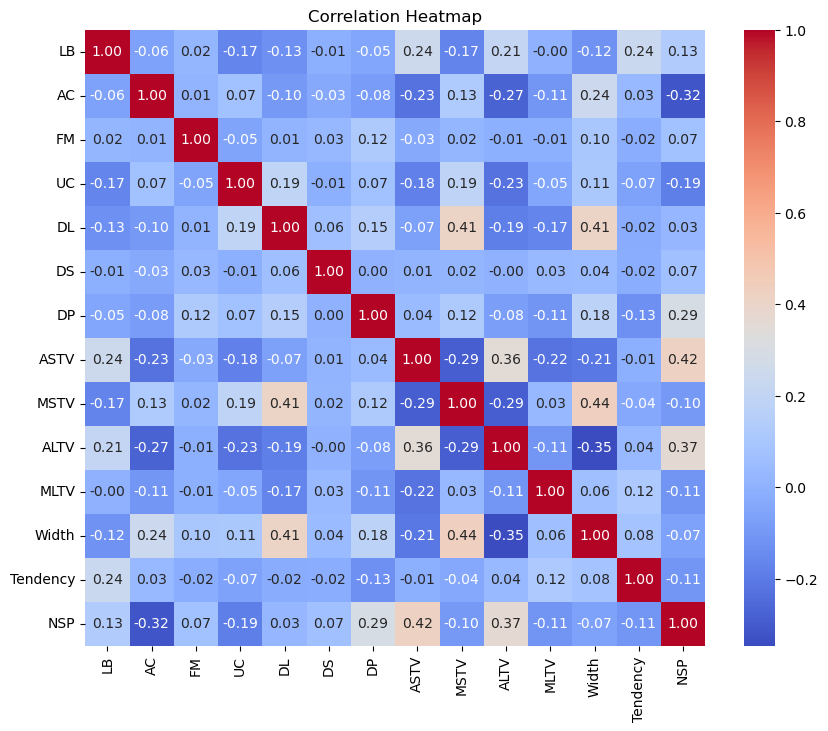

In [27]:
#correlation heatmaps to explore relationships between pairs of variables.

plt.figure(figsize=(10, 8))
sns.heatmap(data[data1].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



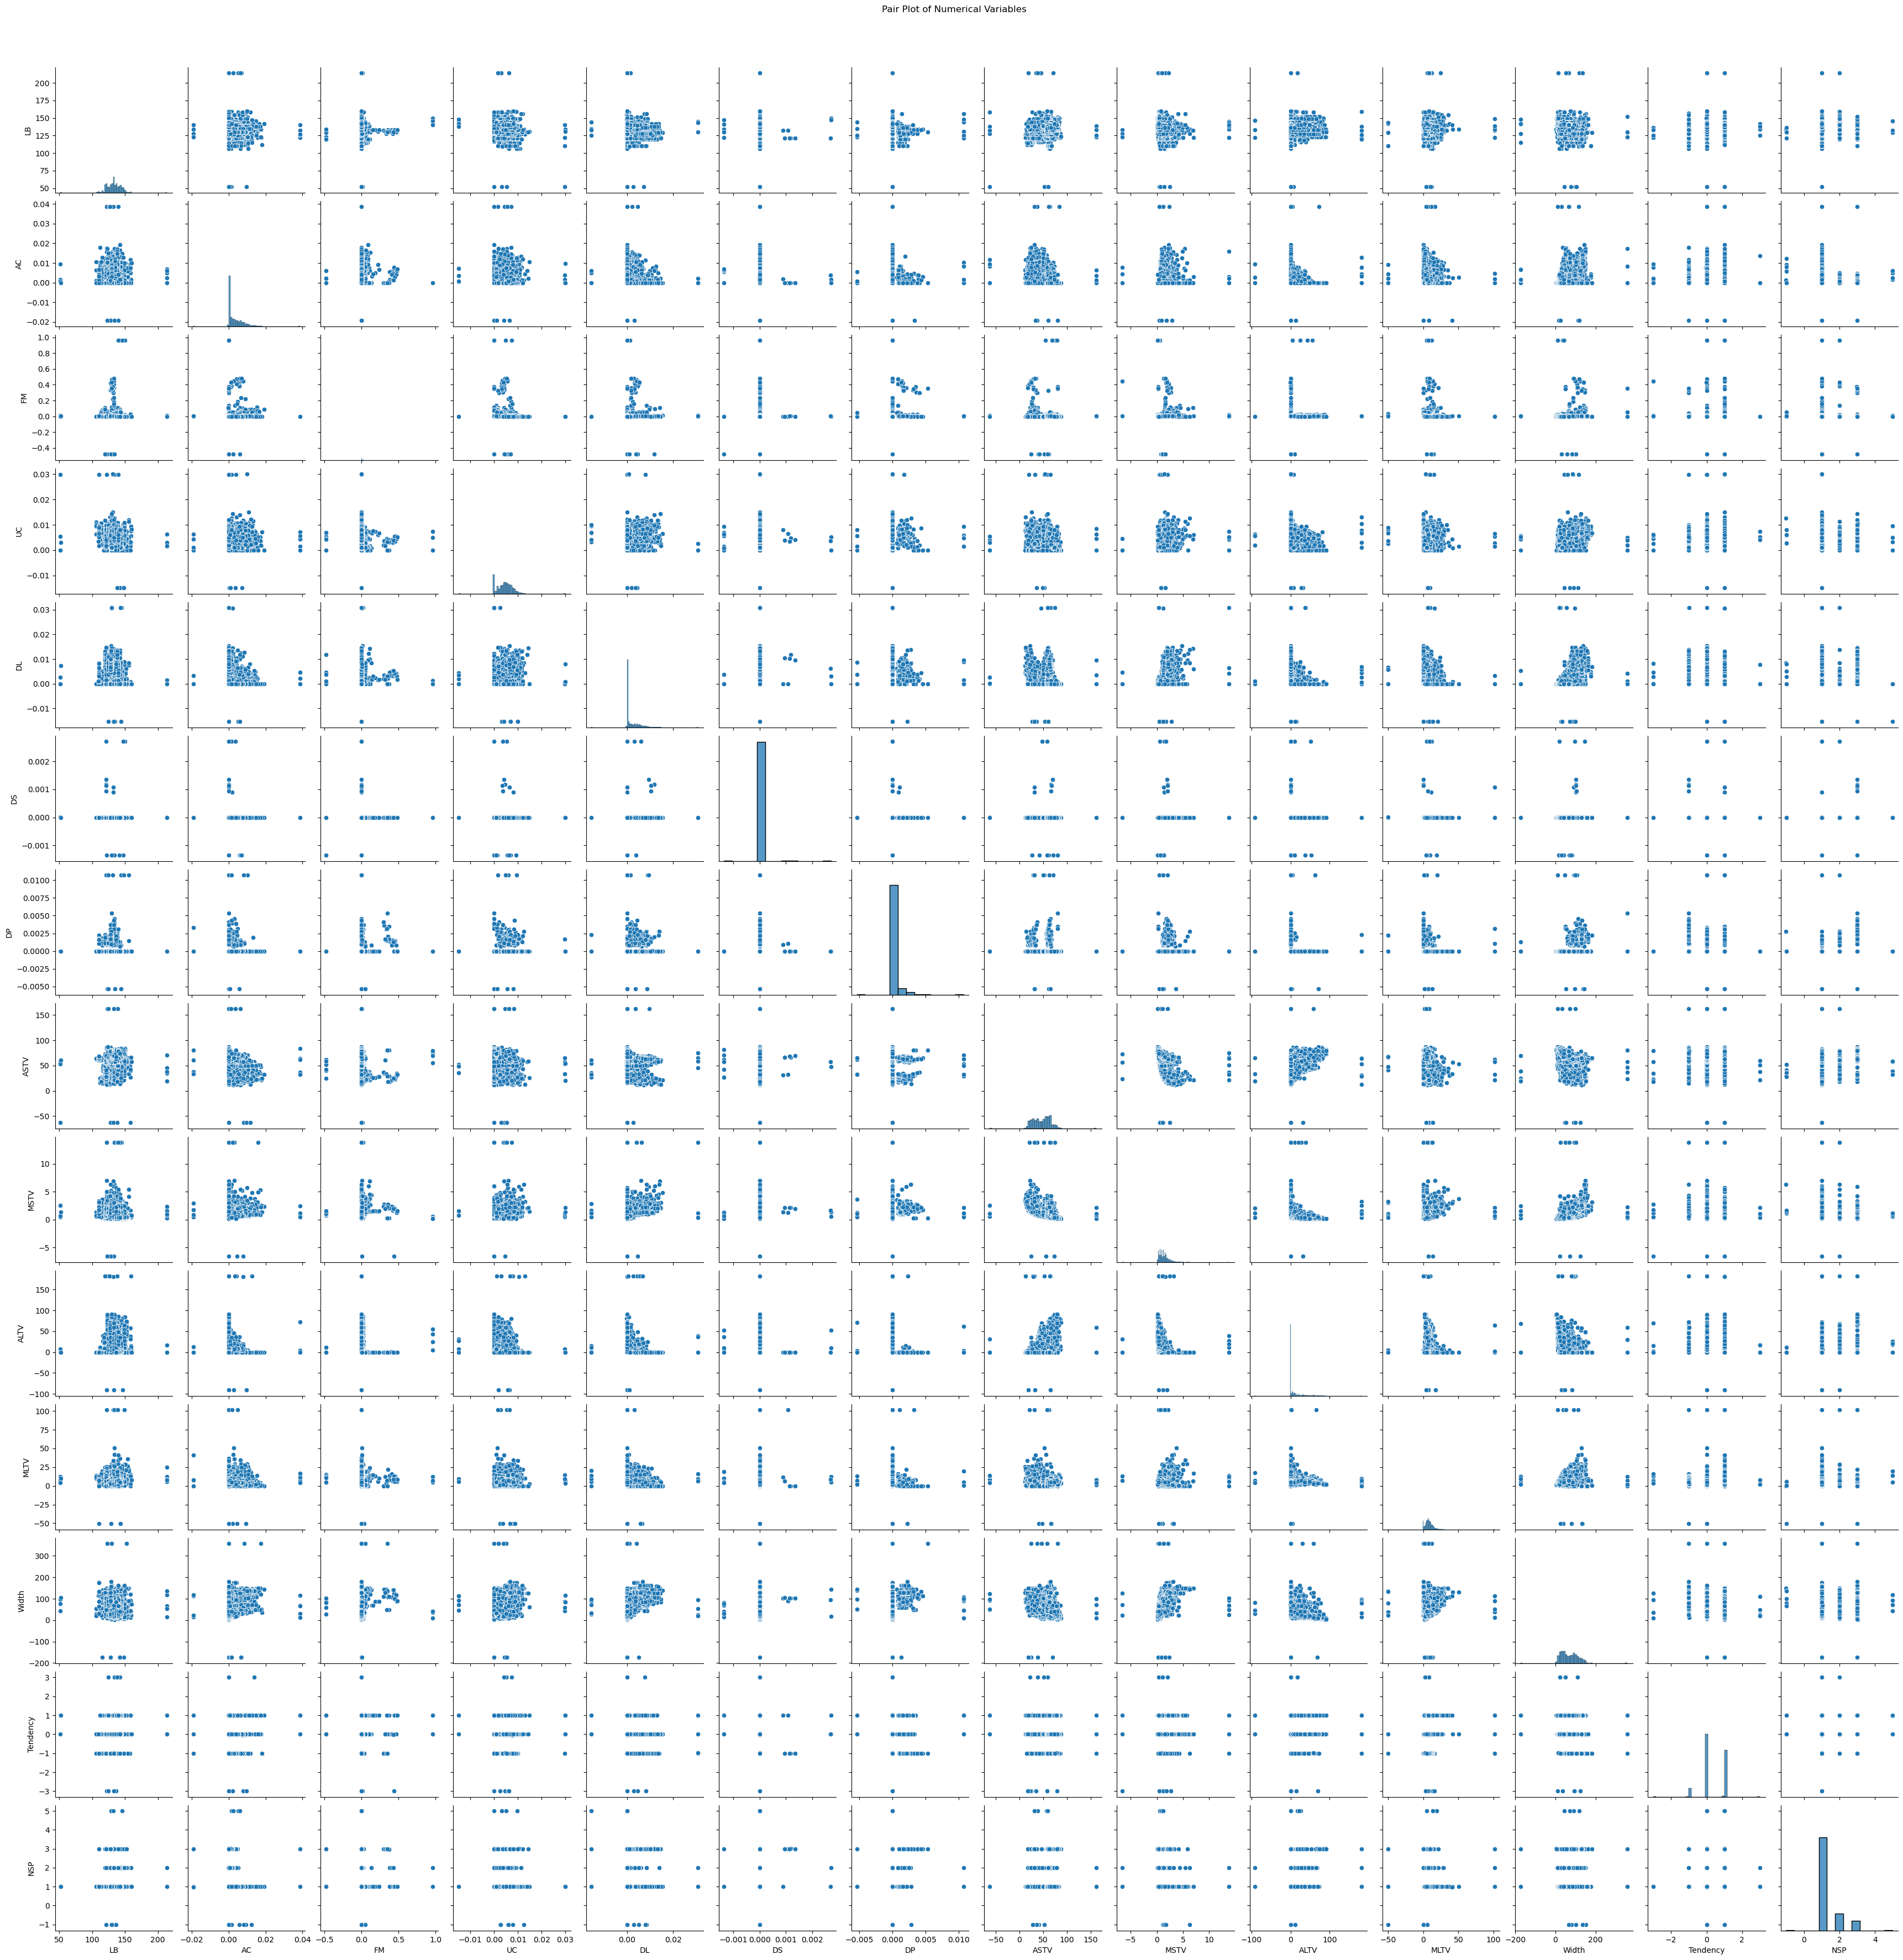

In [30]:
# pair plots, & violin plots for deeper insights.
# Pair plot
sns.pairplot(data[data1])
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

# Violin plot (example)
#plt.figure(figsize=(8, 5))
#sns.violinplot(data=data, x='CategoryColumn', y='NumericColumn')
#plt.title("Violin Plot of NumericColumn by CategoryColumn")
#plt.show()

#### 4.	Pattern Recognition and Insights:

In [31]:
corr_matrix = data[data1].corr()
strong_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1.0)]
print("Strong Positive Correlations:\n", strong_corr)


Strong Positive Correlations:
           LB  AC  FM  UC  DL  DS  DP  ASTV  MSTV  ALTV  MLTV  Width  Tendency  \
LB       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
AC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
FM       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
UC       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DL       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DS       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
DP       NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ASTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MSTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
ALTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN   
MLTV     NaN NaN NaN NaN NaN NaN NaN   NaN   NaN   NaN   NaN    NaN       NaN 